# Análisis Exploratorio de Datos

Datos tomados de la API: https://www.freetogame.com/api-doc

FreeToGame API proporciona acceso a un conjunto de 400 datos sobre juegos free-to-play y MMO gratuitos, incluyendo variables como título, género, desarrollador y otras características relevantes; información que permite realizar un Análisis Exploratorio de Datos (EDA) al identificar patrones, distribuciones, tendencias y relaciones entre las distintas características de los juegos.

Cabe tener en cuenta que, para este ejercicio práctico, se tomaron 190 datos del conjunto de datos anteriormente mencionado

## Inspección Básica

In [109]:
import pandas as pd
from pathlib import Path 

csv_path = Path('..') / 'data' / 'transformed' / 'juegos.csv' 
print("Leyendo CSV desde:", csv_path.resolve()) 
if not csv_path.exists(): 
    raise FileNotFoundError(f"No se encontró el archivo: {csv_path.resolve()}") 

df = pd.read_csv(csv_path) 
df["release_date"] = pd.to_datetime(df["release_date"]) #Se transforma la columna de fechas a datetime64

Leyendo CSV desde: D:\Nicolás\1. Universidad\2. UDEA - Estadística\1. Semestres\6. Sexto Semestre\3. Bases de Datos\Talleres\Taller 4\taller_4_bases_de_datos\data\transformed\juegos.csv


***Inspección de primeras filas***

In [110]:
df.head()

,id,title,genre,platform,developer,release_date,short_description
0,540,Overwatch 2,Shooter,PC (Windows),Blizzard Entertainment,2022-10-04,A hero-focused first-person team shooter from ...
1,516,PUBG: BATTLEGROUNDS,Shooter,PC (Windows),"KRAFTON, Inc.",2022-01-12,Get into the action in one of the longest runn...
2,508,Enlisted,Shooter,PC (Windows),Darkflow Software,2021-04-08,Get ready to command your own World War II mil...
3,604,FragPunk,Shooter,PC (Windows),Bad Guitar Studio,2025-03-06,A free-to-play 5v5 hero shooter that uses card...
4,590,Throne And Liberty,MMORPG,PC (Windows),NCSoft,2024-10-01,A free-to-play multi-platorm MMORPG from NCSof...


***Tipos de datos presentes en el DataFrame***

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 190 non-null    int64         
 1   title              190 non-null    object        
 2   genre              190 non-null    object        
 3   platform           190 non-null    object        
 4   developer          190 non-null    object        
 5   release_date       190 non-null    datetime64[ns]
 6   short_description  190 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 10.5+ KB


***Presencia de registros NULL***

In [57]:
df.isnull().sum()

id                   0
title                0
genre                0
platform             0
developer            0
release_date         0
short_description    0
dtype: int64

No se cuenta con registros NULL en los datos

## Insights Numéricos

***Insight 1***

In [75]:
df["year"] = df["release_date"].dt.year
df["year"].value_counts(ascending=False).sort_index(ascending=False)

year
2025    22
2024    24
2023    20
2022    22
2021    10
2020    22
2019    23
2018    23
2017     8
2016     2
2015     4
2013     2
2012     3
2011     2
2010     1
2001     1
1997     1
Name: count, dtype: int64

De la lista de 190 juegos tomados de FreeToGame API se puede observar que, a partir del año 2018, se publicaron 10 o más juegos. En 2024, se lanzaron 24 juegos, la mayor cantidad de juegos publicados.

***Insight 2***

In [66]:
df["developer"].value_counts().head()

developer
NCSoft           4
NetEase Games    4
R2 Games         4
Riot Games       3
Wargaming        3
Name: count, dtype: int64

De la lista de 190 juegos gratuitos tomados de FreeToGame API se puede observar que, los desarrolladores con mayor cantidad de juegos publicados son NCSoft, NetEase Games y R2 Games con 4 en total.

***Insight 3***

In [67]:
df["platform"].value_counts()

platform
PC (Windows)                 165
Web Browser                   23
PC (Windows), Web Browser      2
Name: count, dtype: int64

De la lista de 190 juegos gratuitos tomados de FreeToGame API se puede observar que, la mayoría de los juegos están disponibles para PC (Windows).

***Insight 4***

In [68]:
df["genre"].value_counts().head()

genre
Shooter      57
MMORPG       50
Strategy     26
Card Game    18
MOBA         10
Name: count, dtype: int64

De la lista de 190 juegos gratuitos tomados de FreeToGame API se puede observar que, el género de juego más frecuente es Shooter, seguido por MMORPG y Strategy.

***Insight 5***

In [85]:
df[df["genre"] == "Shooter"].groupby("developer").size().sort_values(ascending=False).head()

developer
Wargaming            3
1047 Games           2
NetEase Games        2
Darkflow Software    2
Bad Guitar Studio    1
dtype: int64

De la lista de 190 juegos gratuitos tomados de FreeToGame API se puede observar que, la empresa Wargaming es la que más juegos del género 'Shooter' ha desarrollado.

## Visualización

***Gráfico 1: Gráfico de Torta***

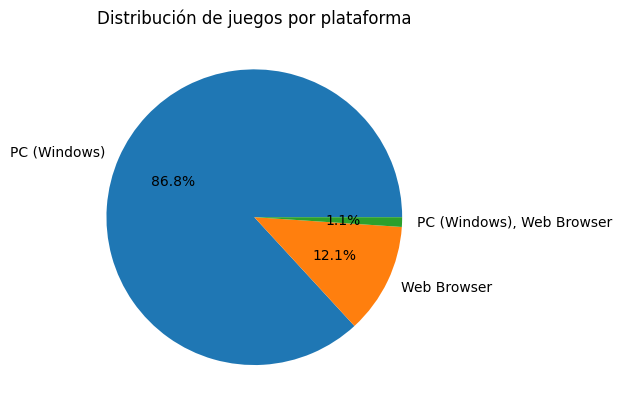

In [106]:
import matplotlib.pyplot as plt
conteo_plataforma = df["platform"].value_counts()

plt.figure()
conteo_plataforma.plot.pie(autopct="%1.1f%%")
plt.title("Distribución de juegos por plataforma")
plt.ylabel("")
plt.show()

De la lista de 190 juegos gratuitos tomados de FreeToGame API se puede observar que, solo el 1.1% pueden jugarse en PC (Windows) y en Web Browser

***Gráfico 2: Gráfico de Barras***

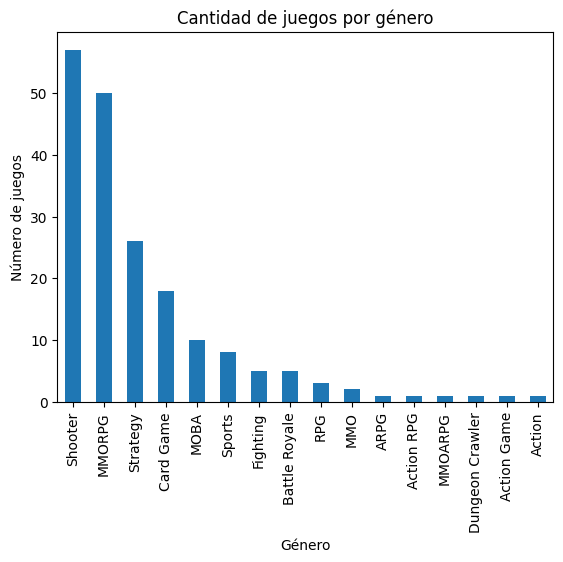

In [107]:
import matplotlib.pyplot as plt
conteo_genero = df["genre"].value_counts()

plt.figure()
conteo_genero.plot(kind="bar")
plt.title("Cantidad de juegos por género")
plt.xlabel("Género")
plt.ylabel("Número de juegos")
plt.show()

De la lista de 190 juegos gratuitos tomados de FreeToGame API se puede observar que, los géneros de juegos menos frecuentes son ARPG, Action ARPG, MMOARPG, Dungeon Crawler y Action

***Gráfico 3: Gráfico de Tendencia***

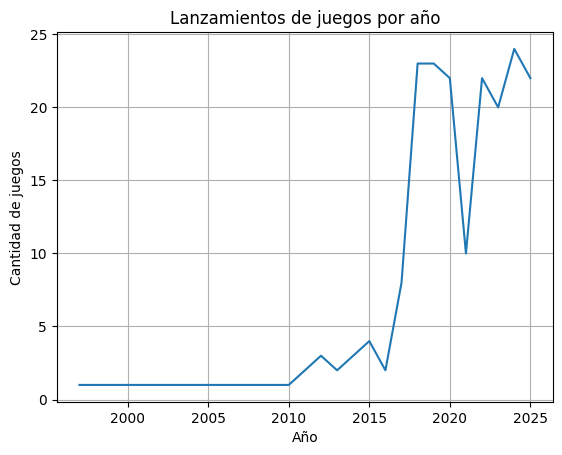

In [92]:
import matplotlib.pyplot as plt
year_counts = df["year"].value_counts().sort_index()

plt.figure()
year_counts.plot()
plt.title("Lanzamientos de juegos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de juegos")
plt.grid()
plt.show()

De la lista de 190 juegos gratuitos tomados de FreeToGame API se puede observar que, hasta 2010 no se presentó un aumento en la cantidad de juegos publicados.